# **Overview - Chemical Properties that affect the Solubility

Dataset with 1128 entries of solubility from small molecules. The data was retrieved from [Molecules Net](https://moleculenet.org/datasets-1). The goal of this project is to explore the data and make the proper cleaning steps before working with it. Once it's ready, a linear regression will be performed to determine which factors affect the solubility based on the compounds present on the dataset.

This project focused on the solubility because it's one of the important physicochemical properties because it determines the ability of the compound to dissolve in a specific amount of solvent at certain temperature. Although, this definition can go further an be applied according to the field that it requires. For example, in pharmaceutics, drugs solubility dictates its bioavility or how the medicine will be absorbed in the body. 

Therefore, it's essential to determine which factors affect this property so it can be used on other environments. Hence, it's good to remark that this work uses a small dataset (ESOL) and extra steps can be made to make the results more precise, along with more data.

## File Information

- File Name: `delaney_processed`
- Number of Rows: `1128`
- Number of Columns: `10`

Column Name  |Description	 |Example Values  |
-----|-----|-----|
Compound ID |Name of the compound |`Fenfuram` |
Predicted log solubility in mols per litre |The predicted value of the solubility in mol/L. |`-0.974,-2.579` |
Minimum Degree |Molecules with the lowest possible number of internal degrees of freedom. |`1, 2` |
Molecular Weight |The total sum of the atomic weights of all atoms in a molecule. |`457.432` |
Number of H-Bond Donors|The number of hydrogen (H) bonds a molecule can form depends on the number of hydrogen bond donors and acceptors. |`7, 1` |
Number of Rings |Indicates if the compund is aromatic and how many rings are present in the compound. |`3, 2`|
Number of Rotatable Bonds |Single covalent bonds that allow free rotation, enabling a molecule to adopt different conformational shapes |`7, 2` |
Polar Surface Area|The sum of surface areas of all polar atoms in a molecule. |`202.32`|
Measured log solubility in mols per litre|The measured value of the solubility in mol/L. |`-3.30,-2.06`|
Smiles|Line notation for representing chemical structures |`Cc1occc1C(=O)Nc2ccccc2`|

### Import Packages

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

#For reading, drawing and writing molecules
from rdkit import Chem
from rdkit.Chem import Draw

#For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For metrics and data modelling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

### Load Dataset

In [2]:
#Load Dataset into a dataframe
df0 = pd.read_csv("delaney_processed.csv")

In [3]:
df0.head(10)

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1
5,benzothiazole,-2.733,2,135.191,0,2,0,12.89,-1.50,c2ccc1scnc1c2
6,"2,2,4,6,6'-PCB",-6.545,1,326.437,0,2,1,0.00,-7.32,Clc1cc(Cl)c(c(Cl)c1)c2c(Cl)cccc2Cl
7,Estradiol,-4.138,1,272.388,2,4,0,40.46,-5.03,CC12CCC3C(CCc4cc(O)ccc34)C2CCC1O
8,Dieldrin,-4.533,1,380.913,0,5,0,12.53,-6.29,ClC4=C(Cl)C5(Cl)C3C1CC(C2OC12)C3C4(Cl)C5(Cl)Cl
9,Rotenone,-5.246,1,394.423,0,5,3,63.22,-4.42,COc5cc4OCC3Oc2c1CC(Oc1ccc2C(=O)C3c4cc5OC)C(C)=C


## Data Exploration

### Basic information about the Dataset

In [4]:
#Dataset info
df0.info()

<class 'pandas.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 10 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Compound ID                                      1128 non-null   str    
 1   ESOL predicted log solubility in mols per litre  1128 non-null   float64
 2   Minimum Degree                                   1128 non-null   int64  
 3   Molecular Weight                                 1128 non-null   float64
 4   Number of H-Bond Donors                          1128 non-null   int64  
 5   Number of Rings                                  1128 non-null   int64  
 6   Number of Rotatable Bonds                        1128 non-null   int64  
 7   Polar Surface Area                               1128 non-null   float64
 8   measured log solubility in mols per litre        1128 non-null   float64
 9   smiles                                   

### Descriptive Stadistics about the Dataset

In [5]:
#Descriptive Stadistics
df0.describe()

,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre
count,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000
mean,-2.988192,1.058511,203.937074,0.701241,1.390957,2.177305,34.872881,-3.050102
std,1.683220,0.238560,102.738077,1.089727,1.318286,2.640974,35.383593,2.096441
min,-9.702000,0.000000,16.043000,0.000000,0.000000,0.000000,0.000000,-11.600000
25%,-3.948250,1.000000,121.183000,0.000000,0.000000,0.000000,0.000000,-4.317500
50%,-2.870000,1.000000,182.179000,0.000000,1.000000,1.000000,26.300000,-2.860000
75%,-1.843750,1.000000,270.372000,1.000000,2.000000,3.000000,55.440000,-1.600000
max,1.091000,2.000000,780.949000,11.000000,8.000000,23.000000,268.680000,1.580000


### Rename columns

In [6]:
# Display column names
df0.columns

Index(['Compound ID', 'ESOL predicted log solubility in mols per litre',
       'Minimum Degree', 'Molecular Weight', 'Number of H-Bond Donors',
       'Number of Rings', 'Number of Rotatable Bonds', 'Polar Surface Area',
       'measured log solubility in mols per litre', 'smiles'],
      dtype='str')

In [7]:
#Setting a dictionary to set new column names
column_map = {'Compound ID': 'compound_id',
               'ESOL predicted log solubility in mols per litre': 'predicted_log_solubility_mol_L',
               'Minimum Degree': 'minimum_degree',
               'Molecular Weight': 'molecular_weight',
               'Number of H-Bond Donors': 'count_H_bond_donors',
               'Number of Rings': 'count_rings',
               'Number of Rotatable Bonds': 'count_rotable_bonds',
               'Polar Surface Area': 'polar_surface_area',
               'measured log solubility in mols per litre':'measured_log_solubility_mol_L',
              }
#Rename Columns
df0 = df0.rename(columns = column_map)
df0.columns

Index(['compound_id', 'predicted_log_solubility_mol_L', 'minimum_degree',
       'molecular_weight', 'count_H_bond_donors', 'count_rings',
       'count_rotable_bonds', 'polar_surface_area',
       'measured_log_solubility_mol_L', 'smiles'],
      dtype='str')

### Check Missing Values

In [8]:
#Checking Nan/Null Values per column and row
print("NaN/Null Values per column:\n", df0.isnull().sum(),"\n")
print("Total rows with NaN/Null values", df0.isnull().any(axis=1).sum())

NaN/Null Values per column:
 compound_id                       0
predicted_log_solubility_mol_L    0
minimum_degree                    0
molecular_weight                  0
count_H_bond_donors               0
count_rings                       0
count_rotable_bonds               0
polar_surface_area                0
measured_log_solubility_mol_L     0
smiles                            0
dtype: int64 

Total rows with NaN/Null values 0


### Check Duplicates

In [9]:
### Check Duplicates
df0.duplicated().sum()

np.int64(0)

It's important to check also the duplicates in the column where string type data appears. Thus, the following code check if there is any duplicate in the 'compound_id' and 'smiles'

In [10]:
#Basic checking duplicated in compound_id column
print("Duplicated Compound ID:", df0['compound_id'].duplicated().sum())

#Normalizing the 'compound_id' column to low string and removing the spaces. This step is only to check if there are any hidden duplicates.
df1 = df0.copy()
df1['compound_id_clean'] = df1['compound_id'].str.strip().str.lower()
hidden_duplicates = df1[df1['compound_id_clean'].duplicated(keep=False)]
print(f"Duplicated Compound ID Clean: {hidden_duplicates.shape[0]}")

Duplicated Compound ID: 0
Duplicated Compound ID Clean: 0


In [11]:
#Checking the chemical structures from the 'smile' column
df1['mol'] = df1['smiles'].apply(Chem.MolFromSmiles)
invalid_structure = df1['mol'].isnull().sum()
print(f"Invalid structrures: {invalid_structure}")

Invalid structrures: 0


In [12]:
df1.head(10)

,compound_id,predicted_log_solubility_mol_L,minimum_degree,molecular_weight,count_H_bond_donors,count_rings,count_rotable_bonds,polar_surface_area,measured_log_solubility_mol_L,smiles,compound_id_clean,mol
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,amigdalin,<rdkit.Chem.rdchem.Mol object at 0x0000024F30E...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2,fenfuram,<rdkit.Chem.rdchem.Mol object at 0x0000024F30E...
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O),citral,<rdkit.Chem.rdchem.Mol object at 0x0000024F30E...
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,picene,<rdkit.Chem.rdchem.Mol object at 0x0000024F30E...
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1,thiophene,<rdkit.Chem.rdchem.Mol object at 0x0000024F30E...
5,benzothiazole,-2.733,2,135.191,0,2,0,12.89,-1.50,c2ccc1scnc1c2,benzothiazole,<rdkit.Chem.rdchem.Mol object at 0x0000024F30E...
6,"2,2,4,6,6'-PCB",-6.545,1,326.437,0,2,1,0.00,-7.32,Clc1cc(Cl)c(c(Cl)c1)c2c(Cl)cccc2Cl,"2,2,4,6,6'-pcb",<rdkit.Chem.rdchem.Mol object at 0x0000024F30E...
7,Estradiol,-4.138,1,272.388,2,4,0,40.46,-5.03,CC12CCC3C(CCc4cc(O)ccc34)C2CCC1O,estradiol,<rdkit.Chem.rdchem.Mol object at 0x0000024F30E...
8,Dieldrin,-4.533,1,380.913,0,5,0,12.53,-6.29,ClC4=C(Cl)C5(Cl)C3C1CC(C2OC12)C3C4(Cl)C5(Cl)Cl,dieldrin,<rdkit.Chem.rdchem.Mol object at 0x0000024F30E...
9,Rotenone,-5.246,1,394.423,0,5,3,63.22,-4.42,COc5cc4OCC3Oc2c1CC(Oc1ccc2C(=O)C3c4cc5OC)C(C)=C,rotenone,<rdkit.Chem.rdchem.Mol object at 0x0000024F30E...


### Check Outliers

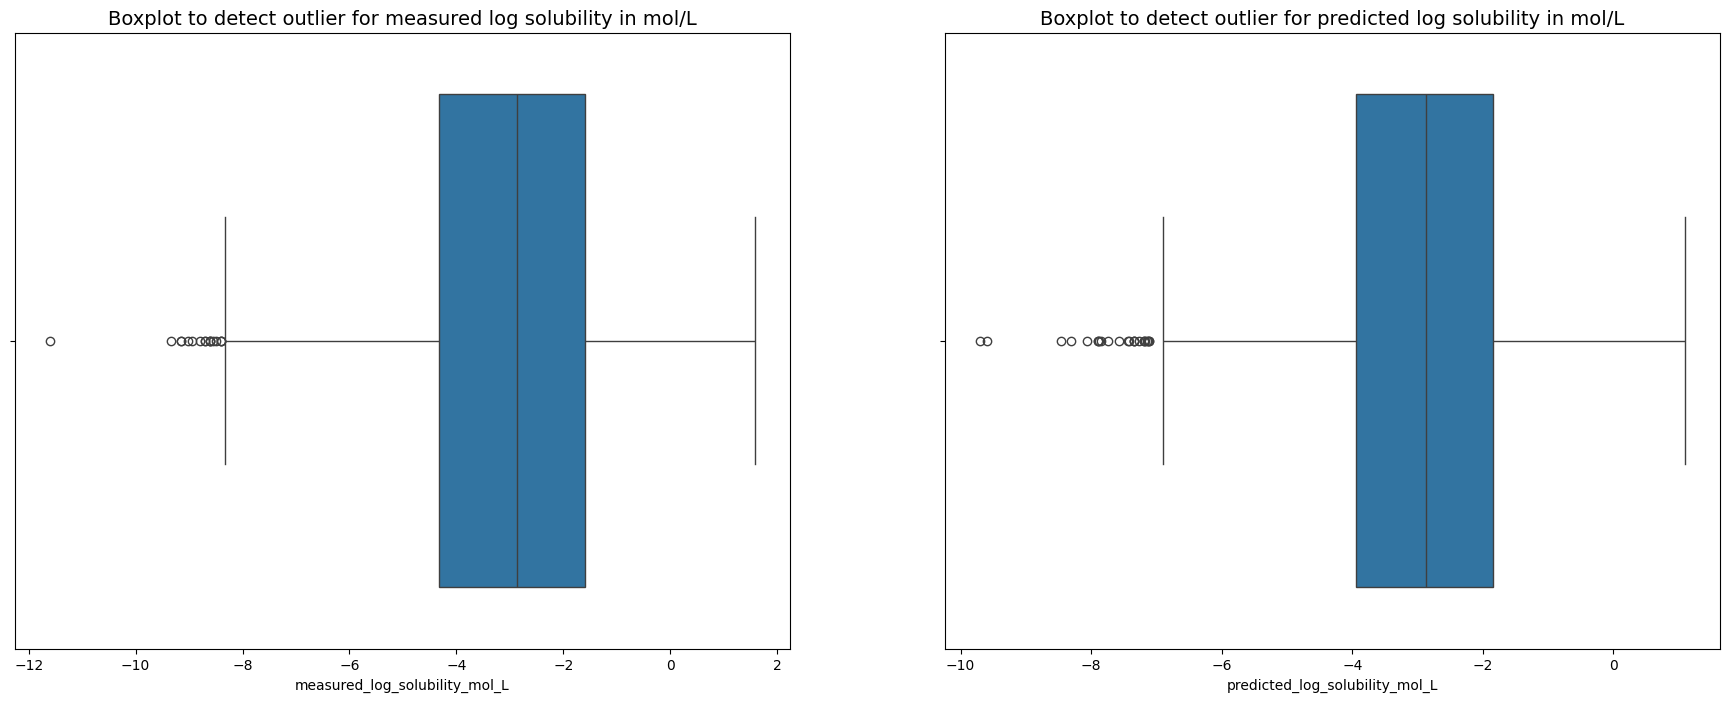

In [13]:
#Boxplot to visualize the distribution from the prediced and meausred log solubility, and detect any outlier
fig, ax = plt.subplots(1, 2, figsize = (22,8))
sns.boxplot(data=df1, x='measured_log_solubility_mol_L', ax=ax[0])
ax[0].set_title("Boxplot to detect outlier for measured log solubility in mol/L", fontsize = '14')
sns.boxplot(data=df1, x='predicted_log_solubility_mol_L', ax=ax[1])
ax[1].set_title("Boxplot to detect outlier for predicted log solubility in mol/L", fontsize = '14')
plt.show()

It seems that boxplot was not the best option to see if the values from both log soublity columns are consistent and reliable. Thus, a histogram wil be made to compare it.

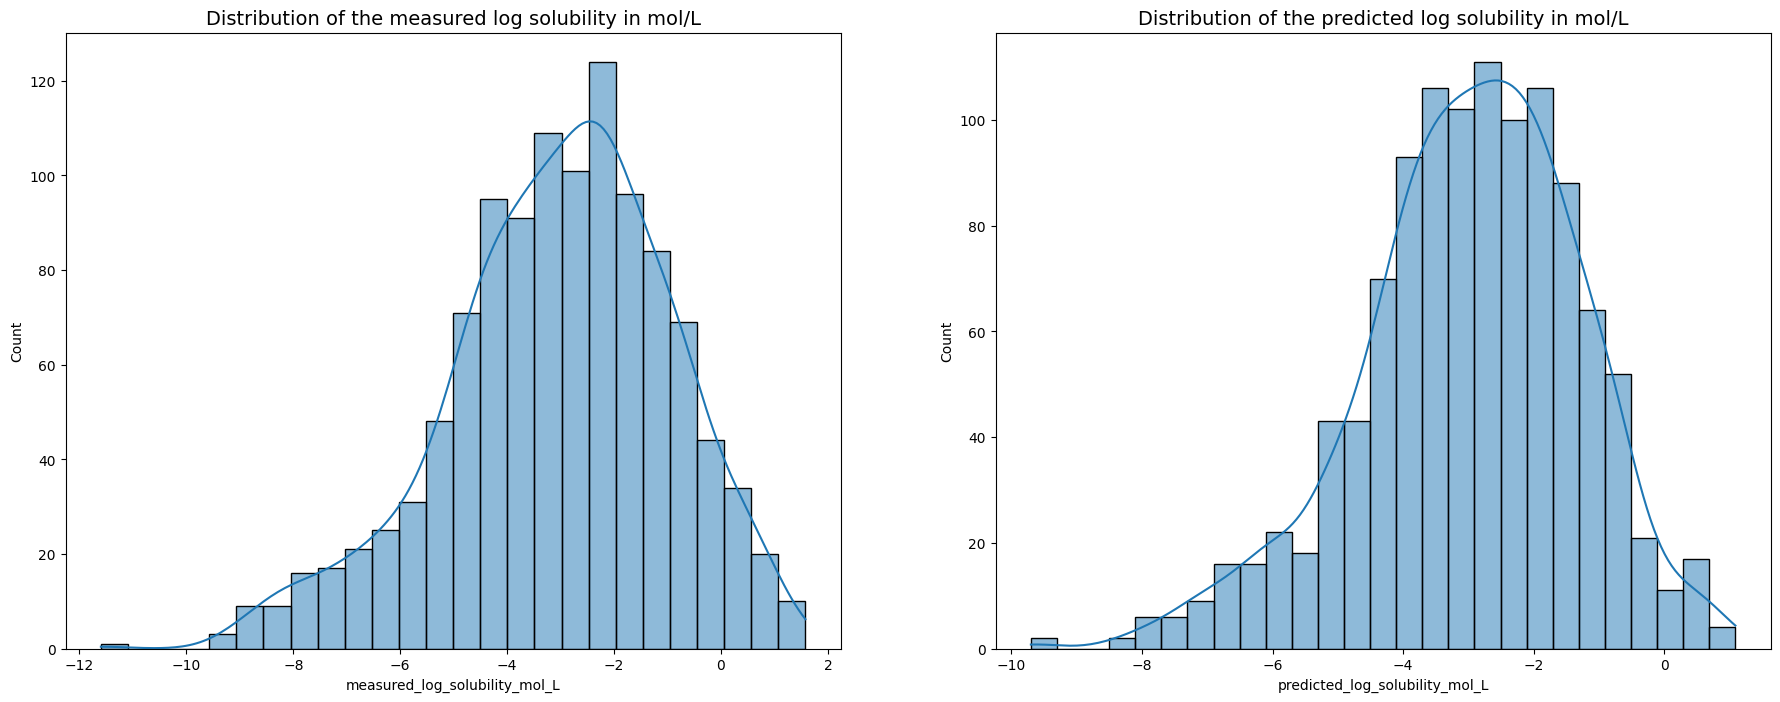

In [14]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))
sns.histplot(data=df1, x='measured_log_solubility_mol_L', kde = True, ax=ax[0])
ax[0].set_title("Distribution of the measured log solubility in mol/L", fontsize = '14')
sns.histplot(data=df1, x='predicted_log_solubility_mol_L', kde =  True, ax=ax[1])
ax[1].set_title("Distribution of the predicted log solubility in mol/L", fontsize = '14')
plt.show()

### Heatmap

A heatmap is a good starting point to have an idea which properties affect the solubility. 

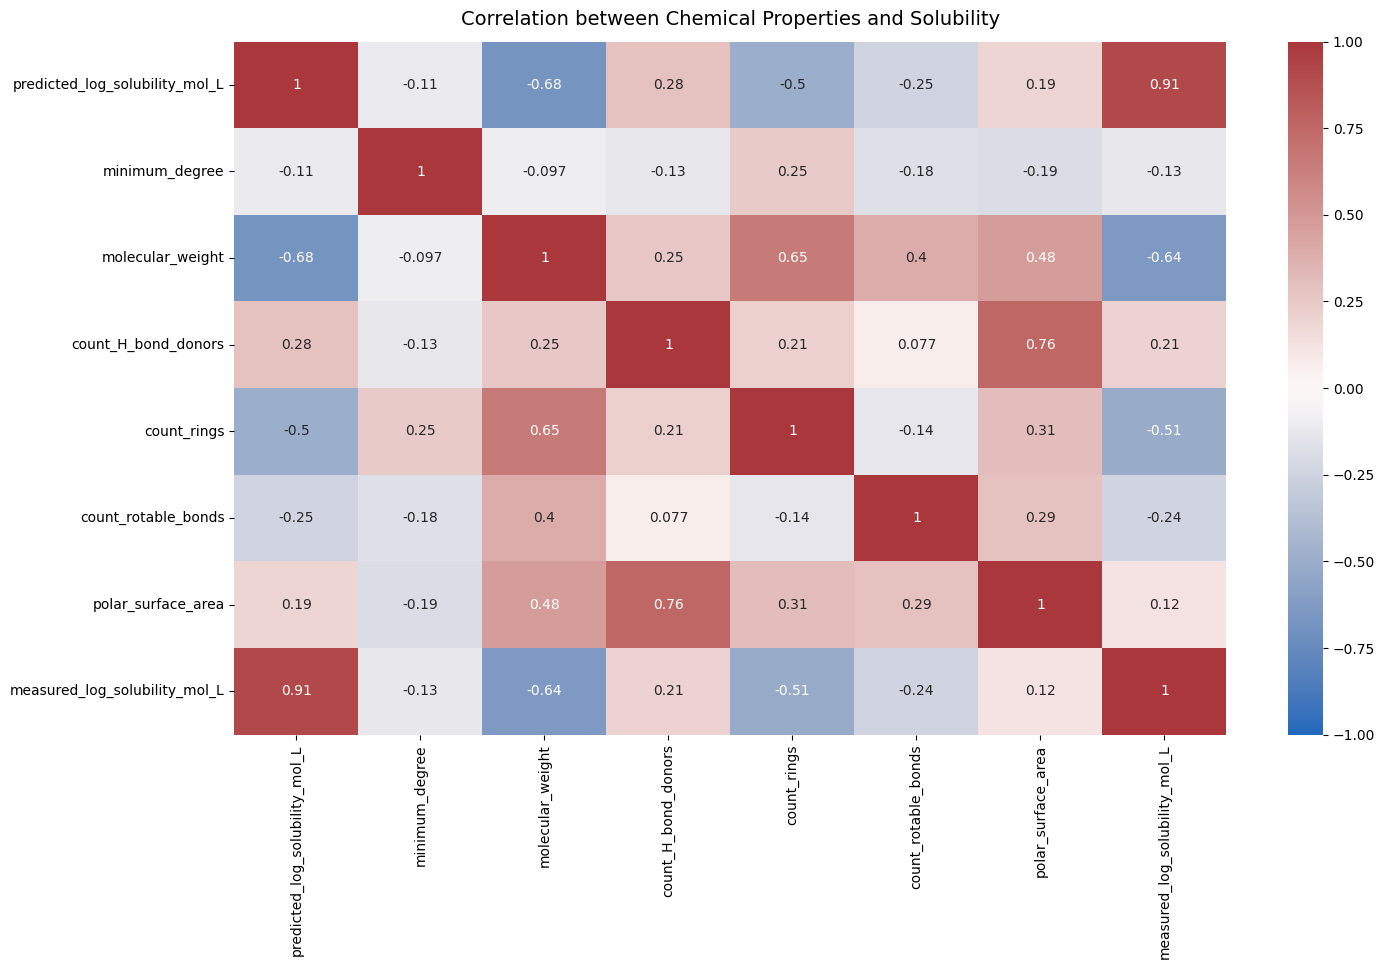

In [15]:
#Ignore the string columns
df2 = df1.select_dtypes(include = [np.number])

# Plot a correlation heatmap

plt.figure(figsize=(16,9))
heatmap = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette('vlag', as_cmap=True))
heatmap.set_title('Correlation between Chemical Properties and Solubility', fontdict={'fontsize':14}, pad=12);

This heatmap gave us the first glimpse on which variables affect the measured solubility
* Molecular weight shows a negative value of -0.64, meaning that the heavier the compound, a low solubility.
* The Polar Surface Area and H Bond Donors show positive values of 0.12 and 0.21 respectively.

 Once we have an idea which factor affect the solubilty, we need to verify these assumptions by making a linear regression.

## Machine Learning: Linear Regression

### Split data into outcome variable and features

In [16]:
#Set X Variable
X = df2.drop(columns = ['measured_log_solubility_mol_L', 'predicted_log_solubility_mol_L'])
#Set Y Variable
y = df2[['measured_log_solubility_mol_L']]

X.head(10)

,minimum_degree,molecular_weight,count_H_bond_donors,count_rings,count_rotable_bonds,polar_surface_area
0,1,457.432,7,3,7,202.32
1,1,201.225,1,2,2,42.24
2,1,152.237,0,0,4,17.07
3,2,278.354,0,5,0,0.00
4,2,84.143,0,1,0,0.00
5,2,135.191,0,2,0,12.89
6,1,326.437,0,2,1,0.00
7,1,272.388,2,4,0,40.46
8,1,380.913,0,5,0,12.53
9,1,394.423,0,5,3,63.22


### Split data into training and test sets

In [17]:
#Create training and testing tests
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Standarize the Data

In [18]:
#Standarize the X Variable
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print("X Train Scaled:", X_train_scaled)

X Train Scaled: [[-0.22936656 -0.7942196   0.2796872  -0.28711034 -0.83999025 -0.42153291]
 [-0.22936656 -1.25780183 -0.65467521 -1.05104406 -0.07927619 -0.73437391]
 [-0.22936656  0.02501948 -0.65467521  0.47682337 -0.83999025 -0.99687595]
 ...
 [-0.22936656  0.80838313  3.08277442  1.24075709 -0.45963322  2.0524706 ]
 [-0.22936656 -0.64976265 -0.65467521 -0.28711034 -0.45963322  0.11769121]
 [-0.22936656 -1.27682989 -0.65467521 -1.05104406 -0.45963322 -0.99687595]]


### Fit the model

In [19]:
#Fit the model to the training data
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


### Evaluate the Model

#### Train Data

In [20]:
#Evaluate the model performance on the training data

r_sq = lr.score(X_train_scaled, y_train)
print("Coefficient of determination:", r_sq)
y_pred_train = lr.predict(X_train_scaled)
print("R^2:", r2_score(y_train, y_pred_train))
print("MAE:", mean_absolute_error(y_train, y_pred_train))
print("MSE:", mean_squared_error(y_train, y_pred_train))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.6813821115715666
R^2: 0.6813821115715666
MAE: 0.9310756609908113
MSE: 1.3722685379493456
RMSE: 1.1714386616248182


#### Test Data

In [21]:
#Scale the X_test Data
X_test_scaled = scaler.transform(X_test)

#Evaluate the model performance on the testing data
r_sq = lr.score(X_test_scaled, y_test)
print("Coefficient of determination", r_sq)
y_pred_test = lr.predict(X_test_scaled)
print("R^2:", r2_score(y_test, y_pred_test))
print("MAE:", mean_absolute_error(y_test, y_pred_test))
print("MSE:", mean_squared_error(y_test, y_pred_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination 0.6960732126950333
R^2: 0.6960732126950333
MAE: 0.8917250421484305
MSE: 1.436602198781464
RMSE: 1.1985834133598978


### Results 

In [22]:
# Creating a result data frame
results = pd.DataFrame(data = {'actual': y_test['measured_log_solubility_mol_L'],
                               'predicted': y_pred_test.ravel()})
results['residuals'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residuals
1091,-2.540,-1.645477,-0.894523
898,-2.253,-1.875271,-0.377729
739,-2.484,-2.060540,-0.423460
140,-2.540,-1.645477,-0.894523
1019,-7.200,-6.120728,-1.079272


### Visualize model results

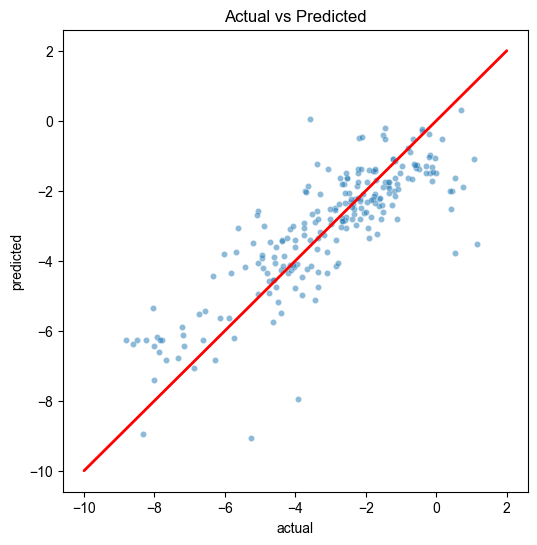

In [23]:
# Scatterplot to visualize 'predicted' vs 'actual'
fig, ax = plt.subplots(figsize = (6,6))
sns.set(style = 'whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
               )
plt.plot([-10,2],[-10,2], c='red', linewidth=2)
plt.title('Actual vs Predicted')
plt.show()

Text(0, 0.5, 'count')

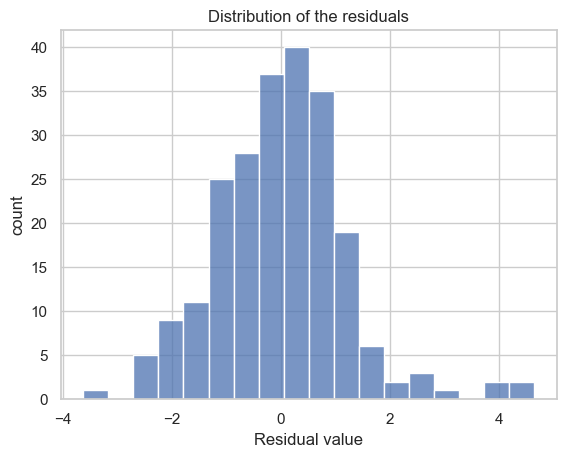

In [24]:
#Visualiza the distribution of the residuals
sns.histplot(results['residuals'])
plt.title('Distribution of the residuals')
plt.xlabel('Residual value')
plt.ylabel('count')

In [25]:
#Residual mean
results['residuals'].mean()

np.float64(-0.018665283877429467)

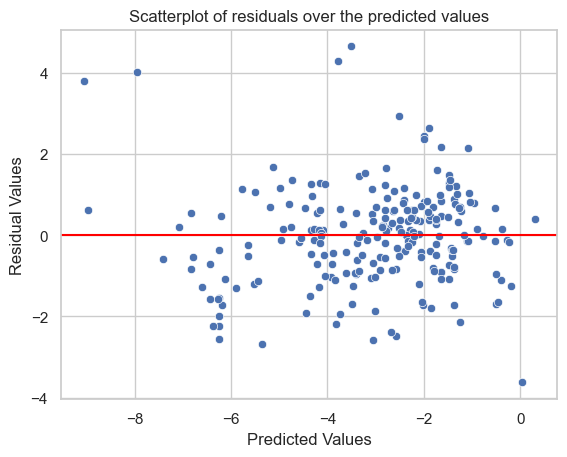

In [26]:
#Scatterplot of 'residuals' over 'predicted'
sns.scatterplot(x='predicted', y='residuals', data = results)
plt.title('Scatterplot of residuals over the predicted values')
plt.axhline(0, c='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residual Values')
plt.show()

### Coefficients

In [27]:
#Create a dataframe with the coefficients by using coef_ attribute
coefficients = pd.DataFrame(lr.coef_, columns = X.columns)
coefficients

,minimum_degree,molecular_weight,count_H_bond_donors,count_rings,count_rotable_bonds,polar_surface_area
0,-0.062497,-1.39298,0.115871,-0.532445,-0.397894,1.090637


From the model, it looks like the 'polar_surface_area' impacts on the solubilty, while the molecular weight has the opposite effect

## Conclusion

The linear regression model achieved a robust performance with an $R^2$ score of approximately 0.69 on the test set. Among the physicochemical descriptors analyzed, Polar Surface Area (PSA) emerged as the most significant positive predictor of solubility. This suggests that for this specific chemical space, the molecular capacity for dipole-dipole interactions and hydrogen bonding—quantified by the PSA—outweighs the hydrophobic effects typically associated with increased molecular weight. These results validate the model's ability to capture the underlying physical chemistry governing solute-solvent interactions